In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


# Load the dataset from the downloaded CSV file
path = 'https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv'
mcdonalds = pd.read_csv(path)

# Display column names
print(mcdonalds.columns.tolist())

# Display dimensions
print(mcdonalds.shape)

# Display first 3 rows
print(mcdonalds.head(3))


['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [4]:
# Select columns from 1 to 11 (indexing starts from 0 in Python)
MD_x = mcdonalds.iloc[:, 0:11].copy()

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)
# Calculate column means
column_means = np.round(MD_x.mean(), 2)

print(column_means)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [7]:
# Perform PCA
MD_pca = PCA()
MD_pca.fit(MD_x)

# Display summary
print("Importance of components:")
print(pd.DataFrame({
    "Standard deviation": np.round(MD_pca.explained_variance_, 4),
    "Proportion of Variance": np.round(MD_pca.explained_variance_ratio_, 4),
    "Cumulative Proportion": np.round(np.cumsum(MD_pca.explained_variance_ratio_), 4)
}))


Importance of components:
    Standard deviation  Proportion of Variance  Cumulative Proportion
0               0.5731                  0.2994                 0.2994
1               0.3690                  0.1928                 0.4922
2               0.2546                  0.1330                 0.6253
3               0.1590                  0.0831                 0.7084
4               0.1138                  0.0595                 0.7679
5               0.0963                  0.0503                 0.8182
6               0.0839                  0.0438                 0.8620
7               0.0757                  0.0395                 0.9016
8               0.0704                  0.0368                 0.9383
9               0.0619                  0.0324                 0.9707
10              0.0561                  0.0293                 1.0000


In [8]:
# Function to print PCA object with specified number of digits
def print_pca(pca_obj, digits):
    print("Standard deviations (1, .., p={}):".format(pca_obj.n_components_))
    print(np.round(pca_obj.explained_variance_, digits))
    print("Rotation (n x k) = ({} x {}):".format(pca_obj.components_.shape[1], pca_obj.components_.shape[0]))
    print(np.round(pca_obj.components_, digits))

# Print PCA object with specified number of digits
print_pca(MD_pca, digits=1)


Standard deviations (1, .., p=11):
[0.6 0.4 0.3 0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Rotation (n x k) = (11 x 11):
[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


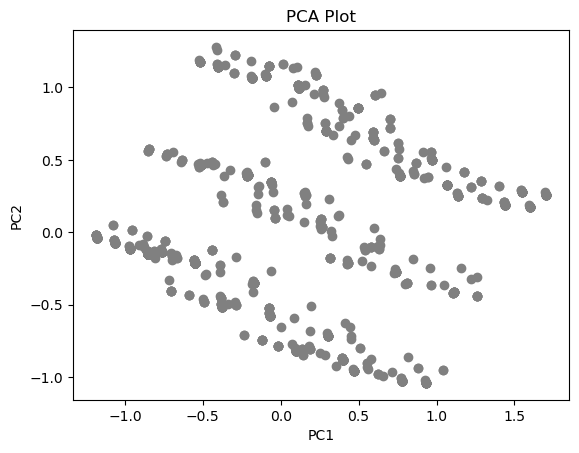

In [9]:
# Perform PCA
MD_pca = PCA()
MD_pca.fit(MD_x)

# Transform data using PCA
transformed_data = MD_pca.transform(MD_x)

# Plot PCA
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], color='grey')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Plot")
plt.show()


In [10]:
# Set random seed
np.random.seed(1234)

# Perform K-means clustering with 2 to 8 clusters
k_values = range(2, 9)
best_model = None
best_score = float('inf')

for k in k_values:
    model = KMeans(n_clusters=k, n_init=10, random_state=1234)
    model.fit(MD_x)
    if model.inertia_ < best_score:
        best_model = model
        best_score = model.inertia_

# Relabel the clusters
cluster_labels = best_model.labels_

# Print cluster labels
print(cluster_labels)


c:\Users\Parth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Parth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Parth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Parth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

[4 2 5 ... 5 3 0]


c:\Users\Parth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Parth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Parth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Parth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

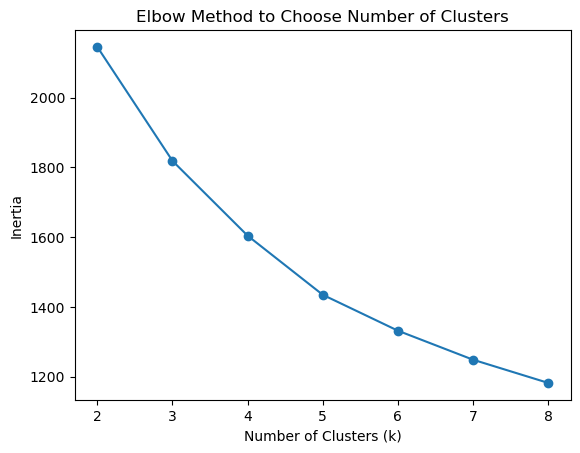

In [11]:
# Fit K-means clustering with a chosen number of clusters
k_values = range(2, 9)  # Choose the range of k values to try
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertia_values.append(kmeans.inertia_)

# Plot inertia (within-cluster sum of squares) vs. number of clusters
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method to Choose Number of Clusters")
plt.show()


In [ ]:
# One-hot encode categorical variables
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Drop first category to avoid multicollinearity
MD_x_encoded = encoder.fit_transform(MD_x)

# Set random seed
np.random.seed(1234)

# Bootstrapping parameters
n_bootstraps = 100
k_values = range(2, 9)
n_rep = 10

# Initialize a list to store bootstrap results
boot_results = []

# Bootstrap loop
for _ in range(n_bootstraps):
    # Generate bootstrap sample indices with replacement
    indices = np.random.choice(len(MD_x_encoded), size=len(MD_x_encoded), replace=True)
    bootstrap_sample = MD_x_encoded[indices]

    # Perform K-means clustering with a chosen number of clusters
    best_model = None
    best_score = float('inf')
    for k in k_values:
        model = KMeans(n_clusters=k, n_init=n_rep, random_state=1234)
        model.fit(bootstrap_sample)
        if model.inertia_ < best_score:
            best_model = model
            best_score = model.inertia_

    # Store the best model for this bootstrap iteration
    boot_results.append(best_model)

# Print the results
for i, model in enumerate(boot_results):
    print(f"Bootstrap {i+1} - Number of Clusters: {model.n_clusters}")